In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
flow = pd.read_csv("flow_train.csv")
transition = pd.read_csv("transition_train.csv")

In [4]:
print("城市数目：", len(flow.city_code.unique()))
print("区县数目：", len(flow.district_code.unique()))
print("城市流通数据量:", len(flow))
print("人口转移数据量:", len(transition))
print("日期范围从：%s - %s"%(flow.date_dt[0], flow.date_dt[len(flow)-1]))
flow[['dwell', 'flow_in', 'flow_out']].describe()

城市数目： 7
区县数目： 98
城市流通数据量: 26852
人口转移数据量: 2480320
日期范围从：20170601 - 20180301


,dwell,flow_in,flow_out
count,26852.000000,26852.000000,26852.000000
mean,257.717463,381.688098,381.688098
std,389.969604,696.205022,692.336528
min,5.626677,6.395142,7.783619
25%,88.396033,64.446269,63.821891
50%,134.785558,121.325777,120.976474
75%,244.481752,314.267251,320.855237
max,3381.988229,5122.628383,5185.365981


In [5]:
flow.head(5)

,date_dt,city_code,district_code,dwell,flow_in,flow_out
0,20170601,06d86ef037e4bd311b94467c3320ff38,85792b2278de59316d1158f6a97537ec,118.861740,54.421293,52.089701
1,20170601,5615dc7c1af1f7dabd80bd8b8ecb1ea0,1d86aa481642ba64ef42e2956339bbad,130.333409,235.490857,231.275943
2,20170601,c7537db4101856877ea6381d0174283c,08751b85e3dc67f2e690cf8945a4d85b,98.698267,57.672715,54.252464
3,20170601,5615dc7c1af1f7dabd80bd8b8ecb1ea0,50ec193f67e23ca084bb7af4100c1243,280.984567,571.333345,555.579813
4,20170601,3f7f0ce35d6d0a08377eb2efe2189f4f,dad5b1a26517a039827215846bcaf394,99.126162,72.334678,69.968155


In [6]:
transition.head(5)

,date_dt,o_city_code,o_district_code,d_city_code,d_district_code,cnt
0,20170601,a20d041605db832309e26c003c626719,879c99a1536ce81df8e84c0c9cf6ff68,3f7f0ce35d6d0a08377eb2efe2189f4f,01bb949d16b241654d3be95fa224abc8,0.008733
1,20170601,c7537db4101856877ea6381d0174283c,82271c9f4c9bf3b072ebe43b29d01caf,c7537db4101856877ea6381d0174283c,4a2ee3a671acbb271743ca0abbcadc70,2.066705
2,20170601,5615dc7c1af1f7dabd80bd8b8ecb1ea0,2d9ca395c9405028ca5d6635253d7166,a20d041605db832309e26c003c626719,01c2fa70527b0c72808f3bc27eaad4c9,0.177562
3,20170601,a20d041605db832309e26c003c626719,cc000ec2dd2b1c6571e74cecc641656e,58a33c947775af5de36841c9f553317d,0b28636d08bff292de12f663d522c55f,0.113523
4,20170601,c7537db4101856877ea6381d0174283c,3f92d69b5335d09f3365beaeec3da4b8,58a33c947775af5de36841c9f553317d,0b28636d08bff292de12f663d522c55f,0.058217


In [7]:
flow[flow.district_code == '85792b2278de59316d1158f6a97537ec'][flow.date_dt == 20170601]

C:\Users\shenzl\AppData\Local\Continuum\anaconda3\envs\dlpy3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,date_dt,city_code,district_code,dwell,flow_in,flow_out
0,20170601,06d86ef037e4bd311b94467c3320ff38,85792b2278de59316d1158f6a97537ec,118.86174,54.421293,52.089701


In [8]:
transition[transition.o_district_code == '85792b2278de59316d1158f6a97537ec'][transition.date_dt == 20170601]['cnt'].sum()

C:\Users\shenzl\AppData\Local\Continuum\anaconda3\envs\dlpy3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


52.08970082260684

In [9]:
transition[transition.d_district_code == '85792b2278de59316d1158f6a97537ec'][transition.date_dt == 20170601]['cnt'].sum()

C:\Users\shenzl\AppData\Local\Continuum\anaconda3\envs\dlpy3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


54.421293466301066

C:\Users\shenzl\AppData\Local\Continuum\anaconda3\envs\dlpy3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


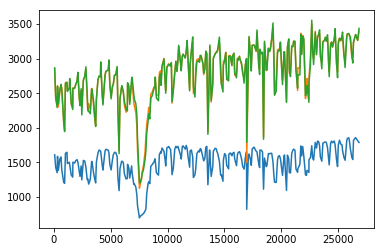

In [10]:
td = flow[flow.city_code == 'a20d041605db832309e26c003c626719'][flow.district_code == '879c99a1536ce81df8e84c0c9cf6ff68']
plt.plot(td.dwell)
plt.plot(td.flow_in)
plt.plot(td.flow_out)

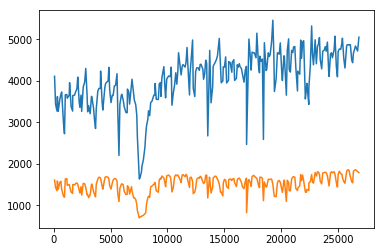

In [11]:
plt.plot( td['flow_in'] + td['flow_out'] - td['dwell'])
plt.plot( td['dwell'])

C:\Users\shenzl\AppData\Local\Continuum\anaconda3\envs\dlpy3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


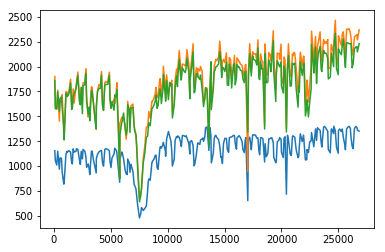

In [12]:
td = flow[flow.city_code == 'a20d041605db832309e26c003c626719'][flow.district_code == 'cc000ec2dd2b1c6571e74cecc641656e']
plt.plot(td.dwell)
plt.plot(td.flow_in)
plt.plot(td.flow_out)

C:\Users\shenzl\AppData\Local\Continuum\anaconda3\envs\dlpy3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


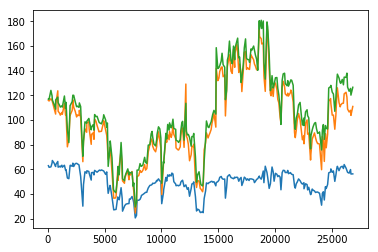

In [13]:
td = flow[flow.city_code == '5615dc7c1af1f7dabd80bd8b8ecb1ea0'][flow.district_code == '2d9ca395c9405028ca5d6635253d7166']
plt.plot(td.dwell)
plt.plot(td.flow_in)
plt.plot(td.flow_out)

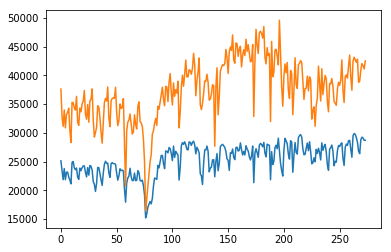

In [14]:
df = flow.groupby(['date_dt'], as_index = False)[['dwell', 'flow_in',
       'flow_out']].sum()
plt.plot(df.dwell)
plt.plot(df.flow_in)


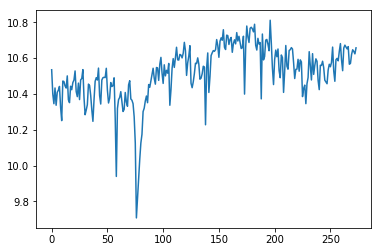

In [17]:
plt.plot(np.log(np.array(df.flow_out[:]) + 1))

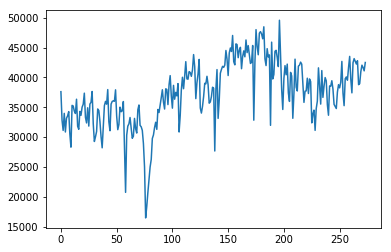

In [18]:
plt.plot(np.array(df.flow_out[:]))

In [95]:
df[50:]

,date_dt,dwell,flow_in,flow_out
50,20170721,22957.495736,33545.499531,33545.499531
51,20170722,21753.835048,31243.158042,31243.158042
52,20170723,22503.894720,32097.152604,32097.152604
53,20170724,23735.586915,35017.578637,35017.578637
54,20170725,23413.690320,34245.384844,34245.384844
55,20170726,23499.426562,34414.269580,34414.269580
56,20170727,23370.679568,35954.349104,35954.349104
57,20170728,20220.424286,28694.005391,28694.005391
58,20170729,17929.138213,20731.916330,20731.916330
59,20170730,21268.744433,30305.493943,30305.493943


In [98]:
df['week'] = df.date_dt%7

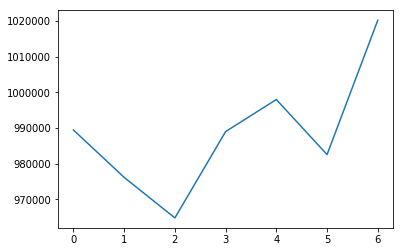

In [102]:
wdf = df.groupby(['week'], as_index = False)[['dwell', 'flow_in',
       'flow_out']].sum()
plt.plot(wdf.dwell)


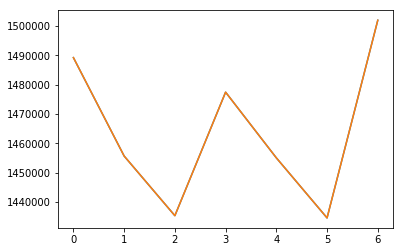

In [103]:
plt.plot(wdf.flow_in)


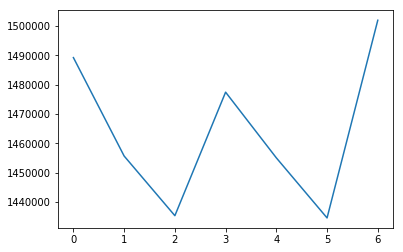

In [104]:
plt.plot(wdf.flow_out)

# arima 1

In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import datetime

import pandas as pd
from pmdarima.arima import auto_arima

flow_df = pd.read_csv('flow_train.csv')
flow_df = flow_df.sort_values(by=['city_code', 'district_code', 'date_dt'])

date_dt = list()
init_date = datetime.date(2018, 3, 2)
for delta in range(15):
    _date = init_date + datetime.timedelta(days=delta)
    date_dt.append(_date.strftime('%Y%m%d'))

district_code_values = flow_df['district_code'].unique()
preds_df = pd.DataFrame()
tmp_df_columns = ['date_dt', 'city_code', 'district_code', 'dwell', 'flow_in', 'flow_out']

for district_code in district_code_values:
    sub_df = flow_df[flow_df['district_code'] == district_code]
    city_code = sub_df['city_code'].iloc[0]

    predict_columns = ['dwell', 'flow_in', 'flow_out']
    tmp_df = pd.DataFrame(data=date_dt, columns=['date_dt'])
    tmp_df['city_code'] = city_code
    tmp_df['district_code'] = district_code

    for column in predict_columns:
        arima_model = auto_arima(sub_df[column], start_p=1, start_q=1, max_p=3, max_q=3, m=7,
                                 start_P=0, seasonal=True, d=1, D=1, trace=True,
                                 error_action='ignore',  # don't want to know if an order does not work
                                 suppress_warnings=True,  # don't want convergence warnings
                                 stepwise=True, n_jobs = 1)

        preds = arima_model.predict(n_periods=15)
        preds = pd.Series(preds)
        tmp_df = pd.concat([tmp_df, preds], axis=1)

    tmp_df.columns = tmp_df_columns
    preds_df = pd.concat([preds_df, tmp_df], axis=0, ignore_index=True)

preds_df = preds_df.sort_values(by=['date_dt'])
preds_df.to_csv('prediction.csv', index=False, header=False)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=2407.592, BIC=2414.759, Fit time=0.013 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=2340.346, BIC=2354.680, Fit time=0.115 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2228.586, BIC=2242.920, Fit time=0.321 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=2229.611, BIC=2247.528, Fit time=0.464 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=2406.703, BIC=2417.454, Fit time=0.060 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=2232.045, BIC=2253.546, Fit time=0.834 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=2230.848, BIC=2241.598, Fit time=0.176 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=2

Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=1820.989, BIC=1842.490, Fit time=0.744 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=1819.880, BIC=1830.630, Fit time=0.200 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=1815.245, BIC=1833.162, Fit time=0.467 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 1, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(1, 1, 1, 7); AIC=1816.816, BIC=1838.317, Fit time=0.481 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 0, 7); AIC=1987.641, BIC=2001.975, Fit time=0.063 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 2, 7); AIC=1816.778, BIC=1838.279, Fit time=0.865 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(1, 1, 2, 7); AIC=1819.056, BIC=1844.140, Fit time=1.165 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=1812.152, BIC=1833.653, Fit time=0.659 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 1, 

Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=2723.250, BIC=2741.167, Fit time=0.211 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 7); AIC=2843.696, BIC=2858.030, Fit time=0.136 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=2723.308, BIC=2744.809, Fit time=0.811 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=2937.497, BIC=2948.247, Fit time=0.039 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 7); AIC=2724.023, BIC=2749.107, Fit time=1.233 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=2725.102, BIC=2746.603, Fit time=0.571 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 7); AIC=2721.390, BIC=2735.724, Fit time=0.234 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=2728.586, BIC=2739.336, Fit time=0.160 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 1, 1, 7); AIC=2720.365, BIC=2738.282, Fit time=0.372 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_o

Fit ARIMA: order=(1, 1, 3) seasonal_order=(1, 1, 1, 7); AIC=1884.380, BIC=1913.048, Fit time=1.076 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 1, 0, 7); AIC=2024.258, BIC=2045.759, Fit time=0.154 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 1, 2, 7); AIC=1884.494, BIC=1913.162, Fit time=1.160 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(1, 1, 2, 7); AIC=1886.583, BIC=1918.834, Fit time=1.452 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(0, 1, 1, 7); AIC=1880.975, BIC=1902.476, Fit time=0.463 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(1, 1, 1, 7); AIC=1882.633, BIC=1907.717, Fit time=0.304 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(0, 1, 0, 7); AIC=2042.215, BIC=2060.132, Fit time=0.302 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(0, 1, 2, 7); AIC=1882.616, BIC=1907.701, Fit time=0.676 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(1, 1, 2, 7); AIC=1884.944, BIC=1913.612, Fit time=0.710 seconds
Total fit time: 8.988 seconds
Fit ARI

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=1855.871, BIC=1866.621, Fit time=0.219 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 4.305 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2006.767, BIC=2024.685, Fit time=0.421 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=2193.895, BIC=2201.062, Fit time=0.011 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=2123.271, BIC=2137.605, Fit time=0.126 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2017.628, BIC=2031.962, Fit time=0.305 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=2008.751, BIC=2030.252, Fit time=0.628 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=2162.094, BIC=2176.428, Fit time=0.244 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=2008.746, BIC=2030.247, Fit time=0.869 seconds
Fit ARIMA: order=(1

Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 1, 1, 7); AIC=1597.406, BIC=1622.491, Fit time=0.757 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 0, 7); AIC=1742.787, BIC=1760.705, Fit time=0.338 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 2, 7); AIC=1597.295, BIC=1622.379, Fit time=1.256 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 1, 2, 7); AIC=1599.393, BIC=1628.061, Fit time=1.772 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=1596.721, BIC=1621.806, Fit time=0.682 seconds
Total fit time: 11.166 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=1603.321, BIC=1621.238, Fit time=0.536 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=1788.850, BIC=1796.017, Fit time=0.010 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=1707.807, BIC=1722.141, Fit time=0.117 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=1615.538, BIC=1629.872, Fit time=0.275 seconds
Fit AR

Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=1732.274, BIC=1753.775, Fit time=0.588 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=1881.675, BIC=1896.009, Fit time=0.293 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=1732.209, BIC=1753.710, Fit time=0.842 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=1733.002, BIC=1758.086, Fit time=1.056 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=1736.578, BIC=1750.912, Fit time=0.243 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=1738.144, BIC=1759.645, Fit time=0.536 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=1739.247, BIC=1749.998, Fit time=0.184 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=1734.489, BIC=1759.574, Fit time=0.752 seconds
Total fit time: 5.461 seconds
Fit ARIMA: order=(1

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2025.201, BIC=2043.118, Fit time=0.678 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=2239.565, BIC=2246.732, Fit time=0.011 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=2145.777, BIC=2160.111, Fit time=0.100 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2054.790, BIC=2069.124, Fit time=0.255 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=2025.150, BIC=2046.651, Fit time=0.629 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 7); AIC=2106.385, BIC=2124.302, Fit time=0.375 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=2027.155, BIC=2052.239, Fit time=1.060 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=2189.829, BIC=2204.163, Fit time=0.254 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2, 7); AIC=2028.309, BIC=2056.977, Fit time=0.744 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_o

Fit ARIMA: order=(3, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=2060.237, BIC=2088.905, Fit time=0.925 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 1, 1, 7); AIC=2081.334, BIC=2102.835, Fit time=0.394 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 1, 1, 7); AIC=2060.714, BIC=2089.382, Fit time=0.936 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 7); AIC=2096.015, BIC=2113.933, Fit time=0.289 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(1, 1, 1, 7); AIC=2062.121, BIC=2094.372, Fit time=1.004 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(2, 1, 1, 7); AIC=2061.050, BIC=2089.718, Fit time=1.244 seconds
Total fit time: 14.612 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=1856.308, BIC=1874.225, Fit time=0.541 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=2061.839, BIC=2069.006, Fit time=0.011 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=1975.872, BIC=1990.206, Fit time=0.123 seconds
Fit AR

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=2179.153, BIC=2204.238, Fit time=0.666 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=2219.633, BIC=2233.967, Fit time=0.103 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=2181.016, BIC=2209.683, Fit time=0.844 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=2179.092, BIC=2204.177, Fit time=0.651 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=2315.366, BIC=2333.284, Fit time=0.351 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=2179.139, BIC=2204.223, Fit time=1.059 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=2180.645, BIC=2209.313, Fit time=1.171 seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2179.138, BIC=2204.223, Fit time=0.458 seconds
Total fit time: 8.487 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2223.484, BIC=2241.402, Fit time=0.392 seconds
Fit ARI

Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 1, 1, 7); AIC=1737.447, BIC=1762.531, Fit time=0.747 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(1, 1, 1, 7); AIC=1739.183, BIC=1767.851, Fit time=0.980 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 1, 0, 7); AIC=1855.610, BIC=1877.111, Fit time=0.528 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 1, 2, 7); AIC=1739.165, BIC=1767.833, Fit time=1.391 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(1, 1, 2, 7); AIC=1740.574, BIC=1772.825, Fit time=1.710 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(0, 1, 1, 7); AIC=1735.781, BIC=1757.282, Fit time=0.493 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(1, 1, 1, 7); AIC=1737.711, BIC=1762.796, Fit time=0.752 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(0, 1, 0, 7); AIC=1861.570, BIC=1879.488, Fit time=0.334 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(0, 1, 2, 7); AIC=1737.706, BIC=1762.790, Fit time=0.846 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_o

Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2278.338, BIC=2292.672, Fit time=0.355 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=2263.103, BIC=2284.604, Fit time=0.538 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 7); AIC=2338.766, BIC=2356.684, Fit time=0.382 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=2265.054, BIC=2290.139, Fit time=1.113 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=2428.152, BIC=2442.486, Fit time=0.250 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2, 7); AIC=2265.376, BIC=2294.044, Fit time=1.316 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=2274.735, BIC=2292.652, Fit time=0.180 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=2256.197, BIC=2281.281, Fit time=0.595 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 1, 1, 7); AIC=2265.614, BIC=2287.115, Fit time=0.234 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_o

Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 1, 1, 7); AIC=2493.257, BIC=2521.925, Fit time=0.961 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 7); AIC=2519.367, BIC=2537.285, Fit time=0.172 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(1, 1, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2505.632, BIC=2527.133, Fit time=0.646 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(2, 1, 1, 7); AIC=2494.107, BIC=2522.775, Fit time=1.381 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 0, 7); AIC=2568.888, BIC=2590.389, Fit time=0.555 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=2495.156, BIC=2523.824, Fit time=1.694 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=2660.277, BIC=2678.194, Fit time=0.222 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(2, 1, 2, 7); AIC=2491.493, BIC=2523.744, Fit time=1.748 seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(2, 1, 

Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=2459.149, BIC=2480.650, Fit time=0.372 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=2600.029, BIC=2614.363, Fit time=0.258 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=2454.842, BIC=2476.343, Fit time=1.153 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=2483.115, BIC=2501.033, Fit time=0.581 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=2451.133, BIC=2476.217, Fit time=0.925 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 2, 7); AIC=2470.613, BIC=2492.114, Fit time=0.443 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 2, 7); AIC=2460.589, BIC=2489.257, Fit time=1.507 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 2, 7); AIC=2488.844, BIC=2506.761, Fit time=0.621 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2301.676, BIC=2319.594, Fit time=0.262 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=2501.823, BIC=2508.990, Fit time=0.020 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=2434.887, BIC=2449.221, Fit time=0.115 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2328.187, BIC=2342.521, Fit time=0.279 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=2303.558, BIC=2325.059, Fit time=0.437 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=2448.961, BIC=2463.295, Fit time=0.248 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=2303.549, BIC=2325.050, Fit time=0.777 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=2304.739, BIC=2329.823, Fit time=1.039 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2307.669, BIC=2329.170, Fit time=0.357 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_o

Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2151.413, BIC=2165.747, Fit time=0.303 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=2151.386, BIC=2169.304, Fit time=0.441 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 7); AIC=2266.792, BIC=2281.125, Fit time=0.122 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=2151.314, BIC=2172.815, Fit time=0.602 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 2, 7); AIC=2161.688, BIC=2179.606, Fit time=0.302 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(1, 1, 2, 7); AIC=2130.935, BIC=2156.020, Fit time=0.846 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(1, 1, 2, 7); AIC=2133.071, BIC=2165.322, Fit time=1.548 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 2, 7); AIC=2129.599, BIC=2151.100, Fit time=0.739 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 

Fit ARIMA: order=(3, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=2457.663, BIC=2486.331, Fit time=1.269 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 2, 7); AIC=2469.498, BIC=2490.999, Fit time=0.472 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 2, 7); AIC=2464.612, BIC=2493.280, Fit time=1.483 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 2, 7); AIC=2490.447, BIC=2508.365, Fit time=0.446 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=2449.067, BIC=2477.735, Fit time=0.867 seconds
Total fit time: 9.768 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2283.770, BIC=2301.688, Fit time=0.313 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=2463.633, BIC=2470.800, Fit time=0.012 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=2398.511, BIC=2412.845, Fit time=0.105 seconds
Fit ARIMA: order=(0

Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=1914.510, BIC=1936.011, Fit time=0.419 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=1911.515, BIC=1940.183, Fit time=1.074 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 1, 1, 7); AIC=1911.737, BIC=1940.405, Fit time=0.994 seconds
Total fit time: 13.000 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=1894.531, BIC=1912.448, Fit time=0.408 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=2081.623, BIC=2088.790, Fit time=0.012 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=2013.186, BIC=2027.520, Fit time=0.145 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=1909.611, BIC=1923.945, Fit time=0.356 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=1896.531, BIC=1918.031, Fit time=0.522 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=2033.195, BIC=2047.529, Fit time=0.240 seconds
Fit AR

Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=1725.311, BIC=1750.395, Fit time=1.078 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=1890.023, BIC=1904.357, Fit time=0.242 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2, 7); AIC=1726.541, BIC=1755.209, Fit time=1.389 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=1749.072, BIC=1766.990, Fit time=0.410 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=1713.452, BIC=1738.537, Fit time=0.697 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 1, 1, 7); AIC=1731.432, BIC=1752.933, Fit time=0.507 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 1, 1, 7); AIC=1714.276, BIC=1742.944, Fit time=0.818 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 7); AIC=1752.164, BIC=1770.081, Fit time=0.355 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(1, 1, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 

Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=1682.341, BIC=1696.675, Fit time=0.275 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=1657.398, BIC=1678.899, Fit time=0.688 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=1799.696, BIC=1814.030, Fit time=0.271 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=1658.352, BIC=1679.853, Fit time=0.830 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=1656.635, BIC=1681.720, Fit time=1.139 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=1651.185, BIC=1672.686, Fit time=0.686 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=1667.949, BIC=1685.867, Fit time=0.264 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=1652.350, BIC=1677.434, Fit time=0.765 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=1688.698, BIC=1703.032, Fit time=0.305 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_o

Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2039.949, BIC=2054.283, Fit time=0.304 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=2018.141, BIC=2039.642, Fit time=0.726 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=2155.959, BIC=2170.293, Fit time=0.260 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=2018.084, BIC=2039.585, Fit time=0.980 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=2018.639, BIC=2043.724, Fit time=1.110 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2010.826, BIC=2032.327, Fit time=0.615 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=2025.292, BIC=2043.209, Fit time=0.352 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=2012.679, BIC=2037.763, Fit time=0.764 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=2044.159, BIC=2058.493, Fit time=0.253 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_o

Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=2191.511, BIC=2220.179, Fit time=1.148 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=2193.571, BIC=2218.656, Fit time=0.824 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2193.307, BIC=2214.808, Fit time=0.547 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=2191.610, BIC=2216.695, Fit time=1.215 seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=2193.339, BIC=2225.591, Fit time=1.445 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 1, 2, 7); AIC=2206.333, BIC=2231.417, Fit time=1.036 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 1, 2, 7); AIC=2189.812, BIC=2222.064, Fit time=1.770 seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(1, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(2, 1, 2, 7); AIC=2200.109, BIC=2235.944, Fit time=1.763 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 1, 

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=1769.204, BIC=1794.288, Fit time=0.661 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=1803.296, BIC=1817.630, Fit time=0.280 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=1765.573, BIC=1790.658, Fit time=0.597 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 0, 7); AIC=1864.098, BIC=1885.599, Fit time=0.239 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=1767.087, BIC=1795.755, Fit time=1.037 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=1933.280, BIC=1951.198, Fit time=0.343 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(2, 1, 2, 7); AIC=1767.086, BIC=1799.338, Fit time=1.172 seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=1767.295, BIC=1795.963, Fit time=0.815 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 1, 

Fit ARIMA: order=(2, 1, 1) seasonal_order=(2, 1, 2, 7); AIC=2364.663, BIC=2396.915, Fit time=1.488 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 2, 7); AIC=2399.263, BIC=2424.347, Fit time=1.158 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=2366.793, BIC=2395.461, Fit time=1.307 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(2, 1, 1, 7); AIC=2368.627, BIC=2397.295, Fit time=0.543 seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(2, 1, 2, 7); AIC=2378.269, BIC=2414.104, Fit time=1.968 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(2, 1, 2, 7); AIC=2382.011, BIC=2410.679, Fit time=1.436 seconds
Total fit time: 22.390 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2953.380, BIC=2971.298, Fit time=0.375 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=3143.489, BIC=3150.656, Fit time=0.011 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=3084.073, BIC=3098.407, Fit time=0.138 seconds
Fit AR

Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=1649.353, BIC=1663.687, Fit time=0.179 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=1626.121, BIC=1647.622, Fit time=0.575 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=1761.328, BIC=1775.662, Fit time=0.257 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=1626.063, BIC=1647.564, Fit time=0.790 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=1627.354, BIC=1652.439, Fit time=0.954 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=1622.729, BIC=1644.230, Fit time=0.559 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=1639.360, BIC=1657.278, Fit time=0.232 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=1624.540, BIC=1649.624, Fit time=0.708 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=1650.734, BIC=1665.068, Fit time=0.158 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_o

Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2499.253, BIC=2513.587, Fit time=0.146 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=2484.311, BIC=2505.812, Fit time=0.703 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 7); AIC=2563.887, BIC=2581.805, Fit time=0.421 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=2488.640, BIC=2513.725, Fit time=0.990 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=2610.188, BIC=2624.522, Fit time=0.348 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2, 7); AIC=2489.131, BIC=2517.799, Fit time=1.491 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=2499.922, BIC=2517.840, Fit time=0.191 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=2486.236, BIC=2511.320, Fit time=0.644 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 7); AIC=2501.395, BIC=2519.313, Fit time=0.174 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_o

Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 2, 7); AIC=2222.406, BIC=2243.907, Fit time=0.586 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 1, 2, 7); AIC=2200.648, BIC=2229.316, Fit time=1.493 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 2, 7); AIC=2222.790, BIC=2240.708, Fit time=0.453 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 1, 2, 7); AIC=2202.398, BIC=2234.649, Fit time=1.859 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2, 7); AIC=2200.706, BIC=2229.374, Fit time=0.969 seconds
Total fit time: 11.447 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2968.847, BIC=2986.764, Fit time=0.468 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=3155.969, BIC=3163.136, Fit time=0.012 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=3085.450, BIC=3099.783, Fit time=0.131 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2984.969, BIC=2999.303, Fit time=0.141 seconds
Fit AR

Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2330.060, BIC=2344.394, Fit time=0.107 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=2322.238, BIC=2343.739, Fit time=0.657 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=2479.046, BIC=2493.380, Fit time=0.272 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=2322.218, BIC=2343.719, Fit time=0.829 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=2319.955, BIC=2345.039, Fit time=1.151 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=2330.295, BIC=2351.796, Fit time=0.779 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 2, 7); AIC=2331.230, BIC=2352.731, Fit time=0.737 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 1, 2, 7); AIC=2333.850, BIC=2362.518, Fit time=1.466 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 

Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=2812.581, BIC=2826.915, Fit time=0.266 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=2805.459, BIC=2826.960, Fit time=0.363 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=2816.849, BIC=2827.599, Fit time=0.146 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=6186.601, BIC=6211.686, Fit time=0.751 seconds
Total fit time: 6.936 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2471.860, BIC=2489.777, Fit time=0.504 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=2649.917, BIC=2657.084, Fit time=0.013 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=2579.358, BIC=2593.692, Fit time=0.161 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2478.528, BIC=2492.862, Fit time=0.152 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=2473.823, BIC=2495.324, Fit time=0.558 seconds
Fit ARI

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=2615.085, BIC=2636.586, Fit time=0.894 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=2615.338, BIC=2640.423, Fit time=0.661 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2615.781, BIC=2637.282, Fit time=0.547 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=2627.369, BIC=2641.703, Fit time=0.116 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=2615.767, BIC=2637.268, Fit time=0.393 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=2630.860, BIC=2641.611, Fit time=0.095 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=2617.574, BIC=2642.658, Fit time=0.665 seconds
Total fit time: 4.575 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2125.564, BIC=2143.482, Fit time=0.517 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=2322.917, BIC=2330.084, Fit time=0.013 seconds
Fit ARI

Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=2131.471, BIC=2149.389, Fit time=0.404 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 7); AIC=2231.830, BIC=2246.164, Fit time=0.134 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=2133.389, BIC=2154.890, Fit time=0.887 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=2321.612, BIC=2332.363, Fit time=0.057 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 7); AIC=2134.480, BIC=2159.564, Fit time=1.168 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 7); AIC=2136.538, BIC=2150.872, Fit time=0.338 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(1, 1, 1, 7); AIC=2133.432, BIC=2154.933, Fit time=0.521 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 1, 1, 7); AIC=2134.699, BIC=2159.783, Fit time=0.674 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 

Fit ARIMA: order=(1, 1, 2) seasonal_order=(2, 1, 2, 7); AIC=2087.047, BIC=2119.298, Fit time=1.634 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(2, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 7); AIC=2090.942, BIC=2116.026, Fit time=1.112 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(2, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(2, 1, 1, 7); AIC=2089.197, BIC=2117.865, Fit time=1.150 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(2, 1, 2, 7); AIC=2087.393, BIC=2116.061, Fit time=1.384 seconds
Total fit time: 12.844 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2188.836, BIC=2206.754, Fit time=0.379 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=2360.813, BIC=2367.980, Fit time=0.012 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=

Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=1706.115, BIC=1724.033, Fit time=0.385 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=1885.897, BIC=1896.647, Fit time=0.053 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=1703.490, BIC=1714.241, Fit time=0.186 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 7); AIC=1704.138, BIC=1718.472, Fit time=0.279 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=1705.470, BIC=1719.804, Fit time=0.250 seconds
Total fit time: 1.622 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7);

Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=2613.268, BIC=2638.352, Fit time=1.256 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=2615.052, BIC=2629.386, Fit time=0.132 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=2610.882, BIC=2632.383, Fit time=0.688 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=2615.390, BIC=2626.140, Fit time=0.163 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=2612.470, BIC=2637.555, Fit time=0.958 seconds
Total fit time: 5.368 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=1812.595, BIC=1830.512, Fit time=0.415 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=1982.534, BIC=1989.701, Fit time=0.012 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=1917.978, BIC=1932.312, Fit time=0.099 seconds
Fit ARIMA: order=(0

Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=2145.605, BIC=2167.106, Fit time=0.621 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=2155.548, BIC=2166.299, Fit time=0.160 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=2146.040, BIC=2171.125, Fit time=0.700 seconds
Total fit time: 5.264 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2124.591, BIC=2142.509, Fit time=0.508 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=2314.140, BIC=2321.307, Fit time=0.012 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=2223.570, BIC=2237.904, Fit time=0.111 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2126.236, BIC=2140.570, Fit time=0.334 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=2125.423, BIC=2146.924, Fit time=0.663 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=2301.625, BIC=2315.959, Fit time=0.145 seconds
Fit ARI

Fit ARIMA: order=(0, 1, 2) seasonal_order=(2, 1, 2, 7); AIC=2232.338, BIC=2261.006, Fit time=1.610 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(2, 1, 1, 7); AIC=2234.785, BIC=2259.870, Fit time=0.965 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(1, 1, 1, 7); AIC=2239.896, BIC=2261.397, Fit time=0.220 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(2, 1, 2, 7); AIC=2231.779, BIC=2264.031, Fit time=1.994 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(2, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 7); AIC=2236.942, BIC=2262.026, Fit time=1.214 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(2, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 1, 2, 7); AIC=2234.788, BIC=2263.456, Fit time=1.379 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(2, 1, 1, 7); AIC=2233.642, BIC

Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=1949.213, BIC=1963.547, Fit time=0.307 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=1951.024, BIC=1968.942, Fit time=0.396 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=2118.153, BIC=2128.904, Fit time=0.060 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=1951.206, BIC=1972.707, Fit time=0.807 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=1949.569, BIC=1960.319, Fit time=0.400 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=1942.186, BIC=1960.104, Fit time=0.425 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 1, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(1, 1, 1, 7); AIC=1943.775, BIC=1965.276, Fit time=0.529 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 0, 7); AIC=2

Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 2, 7); AIC=2265.098, BIC=2290.182, Fit time=1.108 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(2, 1, 2, 7); AIC=2251.589, BIC=2283.840, Fit time=1.955 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 1, 2, 7); AIC=2271.055, BIC=2292.556, Fit time=1.066 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(2, 1, 2, 7); AIC=2259.963, BIC=2295.798, Fit time=1.742 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 1, 7); AIC=2252.550, BIC=2277.634, Fit time=0.637 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 7); AIC=2259.623, BIC=2284.708, Fit time=1.064 seconds
Total fit time: 20.599 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=3018.172, BIC=3025.338, Fit time=0.011 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=2958.713, BIC=2973.047, Fit time=0.136 seconds
Fit ARIMA: order=(

Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=2462.120, BIC=2483.621, Fit time=0.395 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 7); AIC=2469.979, BIC=2484.313, Fit time=0.119 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(1, 1, 1, 7); AIC=2462.568, BIC=2484.069, Fit time=0.228 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 1, 1, 7); AIC=2464.415, BIC=2489.499, Fit time=0.433 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 1, 7); AIC=2462.574, BIC=2484.075, Fit time=0.377 seconds
Total fit time: 4.492 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=1745.447, BIC=1763.364, Fit time=0.523 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=1942.532, BIC=1949.699, Fit time=0.012 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=1875.737, BIC=1890.071, Fit time=0.107 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=1766.974, BIC=1781.308, Fit time=0.319 seconds
Fit ARI

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=2129.967, BIC=2151.468, Fit time=0.963 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=2131.739, BIC=2156.823, Fit time=1.012 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=2131.910, BIC=2146.244, Fit time=0.267 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=2134.548, BIC=2156.049, Fit time=0.585 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=2140.567, BIC=2151.317, Fit time=0.125 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 4.479 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=3311.414, BIC=3329.332, Fit time=0.244 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=3487.300, BIC=3494.467, Fit time=0.012 seconds
Fit ARIMA: order=(1, 1, 0) seas

Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 7); AIC=3494.444, BIC=3512.362, Fit time=0.253 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=3417.424, BIC=3442.509, Fit time=1.480 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=3571.116, BIC=3585.450, Fit time=0.376 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2, 7); AIC=3410.875, BIC=3439.543, Fit time=1.091 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=3411.969, BIC=3429.886, Fit time=0.416 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=3404.873, BIC=3429.957, Fit time=0.572 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 1, 1, 7); AIC=3410.742, BIC=3432.243, Fit time=0.558 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 1, 1, 7); AIC=3409.074, BIC=3437.742, Fit time=0.972 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 7); AIC=3434.588, BIC=3452.506, Fit time=0.478 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_o

Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 1, 1, 7); AIC=2623.368, BIC=2644.869, Fit time=0.263 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 1, 1, 7); AIC=2592.548, BIC=2621.216, Fit time=1.036 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 7); AIC=2639.881, BIC=2657.799, Fit time=0.200 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(1, 1, 1, 7); AIC=2594.808, BIC=2627.059, Fit time=0.762 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2590.802, BIC=2612.303, Fit time=0.342 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=2724.933, BIC=2742.851, Fit time=0.221 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=2590.725, BIC=2615.810, Fit time=0.572 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=2595.350, BIC=2616.851, Fit time=0.401 seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=2591.544, BIC=2620.212, Fit time=0.735 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_o

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2132.988, BIC=2150.906, Fit time=0.449 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=2327.706, BIC=2334.873, Fit time=0.015 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=2238.283, BIC=2252.617, Fit time=0.131 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2146.153, BIC=2160.487, Fit time=0.270 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=2134.772, BIC=2156.273, Fit time=0.540 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=2269.746, BIC=2284.080, Fit time=0.309 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=2134.770, BIC=2156.271, Fit time=0.585 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=2136.629, BIC=2161.713, Fit time=0.909 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2134.699, BIC=2156.200, Fit time=0.384 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_o

Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 0, 7); AIC=3517.540, BIC=3535.457, Fit time=0.275 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 1, 2, 7); AIC=3374.737, BIC=3403.405, Fit time=1.813 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=3373.710, BIC=3391.628, Fit time=0.502 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=3373.729, BIC=3398.813, Fit time=0.786 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 1, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 8.897 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=3716.779, BIC=3734.697, Fit time=0.638 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=3932.607, BIC=3939.774, Fit time=0.019 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=3852.452, BIC=3866.786, Fit time=0.157 seconds
Fit ARIMA: order=(0, 1, 1) seas

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=3459.710, BIC=3477.627, Fit time=0.613 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=3626.416, BIC=3633.583, Fit time=0.012 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=3553.578, BIC=3567.911, Fit time=0.150 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=3464.210, BIC=3478.544, Fit time=0.244 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=3462.537, BIC=3484.038, Fit time=0.406 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=3584.722, BIC=3599.056, Fit time=0.174 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=3460.476, BIC=3481.977, Fit time=1.182 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=3463.624, BIC=3488.709, Fit time=0.999 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=3459.732, BIC=3481.233, Fit time=0.871 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_o

Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2, 7); AIC=3555.201, BIC=3583.869, Fit time=1.067 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 7); AIC=3569.448, BIC=3594.533, Fit time=1.011 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(2, 1, 2, 7); AIC=3560.109, BIC=3592.361, Fit time=1.469 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 2, 7); AIC=3594.089, BIC=3619.174, Fit time=0.797 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(2, 1, 2, 7); AIC=12236266720019765442741912207360.000, BIC=12236266720019765442741912207360.000, Fit time=0.890 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 1, 2, 7); AIC=3619.677, BIC=3641.178, Fit time=0.531 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(2, 1, 2, 7); AIC=3561.084, BIC=3596.919, Fit time=1.904 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 1, 7); AIC=3552.158, BIC=3577.243, Fit time=1.353 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 1, 7); AIC=3564.285, BIC=3585.786, Fit 

Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 7); AIC=3471.142, BIC=3489.060, Fit time=0.225 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=3376.834, BIC=3401.919, Fit time=0.994 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=3382.484, BIC=3403.985, Fit time=0.817 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=3384.036, BIC=3412.704, Fit time=1.183 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 2, 7); AIC=3399.257, BIC=3420.758, Fit time=0.945 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 1, 2, 7); AIC=3396.220, BIC=3424.888, Fit time=1.454 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 2, 7); AIC=3412.595, BIC=3430.512, Fit time=0.704 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 1, 2, 7); AIC=3380.822, BIC=3413.073, Fit time=1.703 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 

Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=3500.549, BIC=3522.050, Fit time=0.558 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=3640.889, BIC=3655.223, Fit time=0.161 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=3500.565, BIC=3522.066, Fit time=0.908 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=3502.565, BIC=3527.650, Fit time=0.883 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=3500.232, BIC=3521.733, Fit time=0.682 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=3521.919, BIC=3536.253, Fit time=0.167 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=3499.771, BIC=3521.272, Fit time=0.559 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=3543.105, BIC=3553.855, Fit time=0.153 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=3502.600, BIC=3527.684, Fit time=0.771 seconds
Total fit time: 5.717 seconds
Fit ARI

Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2854.333, BIC=2868.667, Fit time=0.162 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=2855.504, BIC=2877.005, Fit time=0.527 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=3001.651, BIC=3015.985, Fit time=0.147 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=2855.467, BIC=2876.968, Fit time=0.394 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=2853.538, BIC=2878.622, Fit time=0.932 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=2854.144, BIC=2875.645, Fit time=0.825 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=2854.534, BIC=2883.202, Fit time=0.986 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 2, 7); AIC=2864.286, BIC=2885.787, Fit time=0.845 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 1, 2, 7); AIC=2852.856, BIC=2881.524, Fit time=1.378 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_o

Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=2914.281, BIC=2939.365, Fit time=1.322 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2923.681, BIC=2945.182, Fit time=0.424 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=2949.920, BIC=2964.254, Fit time=0.263 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=2914.922, BIC=2936.423, Fit time=0.509 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=2975.636, BIC=2986.386, Fit time=0.084 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=2917.318, BIC=2942.402, Fit time=0.929 seconds
Total fit time: 5.640 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=3612.484, BIC=3630.402, Fit time=0.334 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=3784.315, BIC=3791.482, Fit time=0.024 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=3719.999, BIC=3734.333, Fit time=0.159 seconds
Fit ARI

Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 1, 0, 7); AIC=2985.809, BIC=3007.310, Fit time=0.287 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 1, 2, 7); AIC=2862.253, BIC=2890.920, Fit time=1.785 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(1, 1, 2, 7); AIC=2865.276, BIC=2897.528, Fit time=2.008 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(0, 1, 1, 7); AIC=2867.874, BIC=2889.375, Fit time=0.310 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 1, 1, 7); AIC=2856.143, BIC=2884.811, Fit time=1.254 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=2874.228, BIC=2899.313, Fit time=0.506 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=2874.612, BIC=2896.113, Fit time=0.552 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(1, 1, 1, 7); AIC=2858.678, BIC=2890.929, Fit time=1.363 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 1, 0, 7); AIC=2951.683, BIC=2976.767, Fit time=0.488 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_o

Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=1988.921, BIC=2003.255, Fit time=0.314 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=1990.332, BIC=2008.249, Fit time=0.385 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=2133.548, BIC=2144.298, Fit time=0.061 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=1990.375, BIC=2008.292, Fit time=0.647 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=1992.272, BIC=2013.773, Fit time=0.801 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=2052.103, BIC=2062.853, Fit time=0.170 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=1989.642, BIC=2007.559, Fit time=0.419 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=1991.038, BIC=2012.539, Fit time=0.650 seconds
Total fit time: 4.137 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2726.273, BIC=2744.191, Fit time=0.549 seconds
Fit ARI

Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=1830.852, BIC=1859.520, Fit time=1.378 seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=1827.190, BIC=1852.275, Fit time=0.722 seconds
Total fit time: 10.883 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=2439.576, BIC=2446.743, Fit time=0.013 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=2340.172, BIC=2354.506, Fit time=0.153 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2267.015, BIC=2281.349, Fit time=0.160 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=2268.648, BIC=2286.566, Fit time=0.366 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=2418.759, BIC=2429.510, Fit time=0.057 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=2268.776, BIC=2286.693, Fit time=0.333 seconds
Fit ARIMA: order=(

Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=2648.885, BIC=2670.386, Fit time=0.352 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=2666.547, BIC=2677.297, Fit time=0.157 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=2648.922, BIC=2674.007, Fit time=0.699 seconds
Total fit time: 6.084 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=3033.406, BIC=3051.323, Fit time=0.578 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=3241.199, BIC=3248.366, Fit time=0.011 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=3145.180, BIC=3159.514, Fit time=0.139 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=3046.180, BIC=3060.514, Fit time=0.299 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=3033.969, BIC=3055.470, Fit time=0.662 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=3189.929, BIC=3204.263, Fit time=0.136 seconds
Fit ARI

Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2107.668, BIC=2122.002, Fit time=0.318 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=2072.607, BIC=2094.108, Fit time=0.430 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=2211.412, BIC=2225.746, Fit time=0.250 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=2072.667, BIC=2094.168, Fit time=0.718 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=2072.404, BIC=2097.489, Fit time=0.633 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2071.057, BIC=2092.558, Fit time=0.664 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=2120.505, BIC=2134.839, Fit time=0.288 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=2070.586, BIC=2092.087, Fit time=0.928 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 1, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 1, 

Fit ARIMA: order=(2, 1, 2) seasonal_order=(2, 1, 1, 7); AIC=1494.172, BIC=1526.424, Fit time=1.079 seconds
Total fit time: 13.441 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=1879.590, BIC=1886.757, Fit time=0.010 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=1785.505, BIC=1799.839, Fit time=0.107 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=1703.974, BIC=1718.308, Fit time=0.325 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=1704.773, BIC=1722.690, Fit time=0.289 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=1879.149, BIC=1889.899, Fit time=0.054 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=1704.936, BIC=1722.853, Fit time=0.388 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=1706.030, BIC=1727.531, Fit time=0.667 seconds
Fit ARIMA: order=(

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2749.111, BIC=2767.028, Fit time=0.502 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=2931.703, BIC=2938.870, Fit time=0.011 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=2850.403, BIC=2864.737, Fit time=0.104 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2758.839, BIC=2773.173, Fit time=0.155 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=2750.841, BIC=2772.342, Fit time=0.643 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=2899.483, BIC=2913.817, Fit time=0.250 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=2751.668, BIC=2773.169, Fit time=0.602 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=2751.782, BIC=2776.866, Fit time=1.179 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2751.541, BIC=2773.042, Fit time=0.463 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_o

Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 1, 1, 7); AIC=1666.900, BIC=1691.984, Fit time=0.796 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(1, 1, 1, 7); AIC=1667.166, BIC=1688.667, Fit time=0.606 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 0, 7); AIC=1798.072, BIC=1812.406, Fit time=0.256 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 2, 7); AIC=1667.261, BIC=1688.762, Fit time=0.971 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(1, 1, 2, 7); AIC=1668.902, BIC=1693.987, Fit time=1.365 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=1667.168, BIC=1688.669, Fit time=0.692 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(0, 1, 1, 7); AIC=1666.094, BIC=1687.595, Fit time=0.794 seconds
Total fit time: 8.192 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=1843.667, BIC=1850.834, Fit time=0.011 seconds
Fit ARIMA: order=(1

Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=2156.509, BIC=2181.593, Fit time=1.091 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2149.972, BIC=2171.473, Fit time=0.682 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=2180.057, BIC=2197.975, Fit time=0.351 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=2155.403, BIC=2180.488, Fit time=0.828 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=2199.535, BIC=2213.869, Fit time=0.268 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=2152.944, BIC=2181.612, Fit time=0.963 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=2151.583, BIC=2176.668, Fit time=0.616 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=2296.086, BIC=2314.003, Fit time=0.383 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=2151.597, BIC=2176.681, Fit time=1.001 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_o

Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2457.346, BIC=2478.847, Fit time=0.641 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=2483.294, BIC=2497.628, Fit time=0.128 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=2457.343, BIC=2478.844, Fit time=0.286 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=2512.678, BIC=2523.428, Fit time=0.097 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=2459.290, BIC=2484.374, Fit time=0.662 seconds
Total fit time: 3.862 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2126.399, BIC=2144.316, Fit time=0.522 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=2346.398, BIC=2353.565, Fit time=0.010 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=2263.038, BIC=2277.372, Fit time=0.131 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2168.476, BIC=2182.810, Fit time=0.359 seconds
Fit ARI

Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 1, 1, 7); AIC=1571.673, BIC=1596.757, Fit time=0.362 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 0, 7); AIC=1697.749, BIC=1715.667, Fit time=0.325 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 2, 7); AIC=1571.665, BIC=1596.750, Fit time=1.116 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 1, 2, 7); AIC=1571.760, BIC=1600.428, Fit time=1.417 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=1568.701, BIC=1586.618, Fit time=0.334 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(0, 1, 1, 7); AIC=1570.078, BIC=1591.579, Fit time=0.437 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(1, 1, 1, 7); AIC=1570.701, BIC=1592.202, Fit time=0.376 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 0, 7); AIC=1700.876, BIC=1715.210, Fit time=0.241 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 2, 7); AIC=1570.701, BIC=1592.202, Fit time=0.823 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_o

Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=2579.248, BIC=2600.749, Fit time=0.674 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=2595.178, BIC=2605.928, Fit time=0.152 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=2576.698, BIC=2601.782, Fit time=0.778 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 1, 1, 7); AIC=2581.901, BIC=2610.569, Fit time=0.805 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 0, 7); AIC=2742.108, BIC=2763.609, Fit time=0.339 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 2, 7); AIC=2580.325, BIC=2608.993, Fit time=1.622 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 1, 2, 7); AIC=2582.123, BIC=2614.374, Fit time=1.776 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=2582.964, BIC=2611.632, Fit time=0.608 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 1, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(0, 1, 

Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=1506.193, BIC=1520.527, Fit time=0.456 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=1493.114, BIC=1514.615, Fit time=0.513 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=1619.667, BIC=1634.001, Fit time=0.306 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=1493.405, BIC=1514.906, Fit time=0.617 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=1496.475, BIC=1521.559, Fit time=0.659 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=1491.685, BIC=1513.186, Fit time=0.452 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=1517.877, BIC=1535.794, Fit time=0.335 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=1493.493, BIC=1518.577, Fit time=0.804 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=1524.795, BIC=1539.129, Fit time=0.277 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_o

Fit ARIMA: order=(0, 1, 3) seasonal_order=(0, 1, 0, 7); AIC=2362.676, BIC=2380.594, Fit time=0.293 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(0, 1, 2, 7); AIC=2226.162, BIC=2251.246, Fit time=1.215 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(1, 1, 2, 7); AIC=2227.772, BIC=2256.440, Fit time=1.401 seconds
Total fit time: 12.342 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2426.025, BIC=2443.943, Fit time=0.589 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=2643.689, BIC=2650.856, Fit time=0.011 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=2549.433, BIC=2563.767, Fit time=0.157 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2449.850, BIC=2464.184, Fit time=0.273 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=2425.887, BIC=2447.388, Fit time=0.796 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 7); AIC=2506.644, BIC=2524.562, Fit time=0.391 seconds
Fit AR

Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2094.031, BIC=2108.365, Fit time=0.333 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=2094.828, BIC=2112.745, Fit time=0.404 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=2232.588, BIC=2243.338, Fit time=0.074 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=2094.945, BIC=2112.862, Fit time=0.573 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=2097.106, BIC=2118.607, Fit time=0.767 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=2148.074, BIC=2158.824, Fit time=0.190 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=2094.502, BIC=2112.419, Fit time=0.421 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=2095.819, BIC=2117.320, Fit time=0.645 seconds
Total fit time: 3.586 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=1957.483, BIC=1975.400, Fit time=0.734 seconds
Fit ARI

Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=2582.590, BIC=2596.924, Fit time=0.161 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2490.259, BIC=2504.593, Fit time=0.149 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=2475.137, BIC=2496.638, Fit time=0.512 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=2610.382, BIC=2624.716, Fit time=0.261 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=2475.099, BIC=2496.600, Fit time=0.638 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=2476.608, BIC=2501.693, Fit time=1.163 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=2463.359, BIC=2484.860, Fit time=0.735 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=2482.379, BIC=2500.296, Fit time=0.146 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=2472.207, BIC=2497.292, Fit time=0.823 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_o

# arima 2

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import datetime
import warnings

import numpy as np
import pandas as pd
from pmdarima.arima import auto_arima

warnings.filterwarnings('ignore')

flow_df = pd.read_csv('flow_train.csv')
flow_df = flow_df.sort_values(by=['city_code', 'district_code', 'date_dt'])

date_dt = list()
init_date = datetime.date(2018, 3, 2)
for delta in range(15):
    _date = init_date + datetime.timedelta(days=delta)
    date_dt.append(_date.strftime('%Y%m%d'))

district_code_values = flow_df['district_code'].unique()
preds_df = pd.DataFrame()
tmp_df_columns = ['date_dt', 'city_code', 'district_code', 'dwell', 'flow_in', 'flow_out']

for district_code in district_code_values:
    sub_df = flow_df[flow_df['district_code'] == district_code]
    city_code = sub_df['city_code'].iloc[0]

    predict_columns = ['dwell', 'flow_in', 'flow_out']
    tmp_df = pd.DataFrame(data=date_dt, columns=['date_dt'])
    tmp_df['city_code'] = city_code
    tmp_df['district_code'] = district_code

    for column in predict_columns:
        ts_log = np.log(1 + sub_df[column])
        arima_model = auto_arima(ts_log, start_p=1, max_p=9, start_q=1, max_q=9, max_d=5,
                                 start_P=1, max_P=9, start_Q=1, max_Q=9, max_D=5,
                                 m=7, random_state=2018,
                                 trace=True,
                                 seasonal=True,
                                 error_action='ignore',
                                 suppress_warnings=True,
                                 n_jobs = -1,
                                 stepwise=True)

        preds = arima_model.predict(n_periods=15)
        preds = pd.Series(preds)
        preds = np.exp(preds) - 1
        tmp_df = pd.concat([tmp_df, preds], axis=1)

    tmp_df.columns = tmp_df_columns
    preds_df = pd.concat([preds_df, tmp_df], axis=0, ignore_index=True)

preds_df = preds_df.sort_values(by=['date_dt'])
preds_df.to_csv('prediction1.csv', index=False, header=False)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-402.383, BIC=-380.726, Fit time=0.372 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-389.844, BIC=-382.625, Fit time=0.030 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 7); AIC=-394.478, BIC=-380.040, Fit time=0.130 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-396.877, BIC=-382.439, Fit time=0.113 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-403.199, BIC=-385.152, Fit time=0.437 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-406.442, BIC=-392.004, Fit time=0.244 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-394.209, BIC=-383.381, Fit time=0.060 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-392.855, BIC=-382.027, Fit time=0.030 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-293.858, BIC=-275.810, Fit time=0.494 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-295.541, BIC=-281.103, Fit time=0.245 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-288.858, BIC=-278.029, Fit time=0.050 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-287.894, BIC=-277.066, Fit time=0.070 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 0, 7); AIC=-293.839, BIC=-275.792, Fit time=0.375 seconds
Total fit time: 1.960 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-515.662, BIC=-494.005, Fit time=0.476 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-342.818, BIC=-324.770, Fit time=0.454 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-344.822, BIC=-330.384, Fit time=0.309 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-335.538, BIC=-324.710, Fit time=0.050 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-335.320, BIC=-324.491, Fit time=0.050 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=-341.392, BIC=-323.345, Fit time=0.287 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=-340.505, BIC=-318.848, Fit time=0.339 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 0, 7); AIC=-342.374, BIC=-324.327, Fit time=0.389 seconds
Total fit time: 2.756 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-534.730, BIC=-513.073, Fit time=0.446 seconds
Fit ARIMA: order=(0

Fit ARIMA: order=(3, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-319.178, BIC=-293.912, Fit time=0.505 seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-318.160, BIC=-289.284, Fit time=0.664 seconds
Fit ARIMA: order=(4, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-322.643, BIC=-297.377, Fit time=0.402 seconds
Fit ARIMA: order=(4, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-317.830, BIC=-296.173, Fit time=0.100 seconds
Fit ARIMA: order=(4, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-319.177, BIC=-301.130, Fit time=0.080 seconds
Fit ARIMA: order=(5, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=-318.556, BIC=-286.070, Fit time=0.518 seconds
Fit ARIMA: order=(4, 1, 1) seasonal_order=(1, 0, 0, 7); AIC=-318.666, BIC=-289.790, Fit time=0.605 seconds
Fit ARIMA: order=(4, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-320.429, BIC=-291.553, Fit time=0.563 seconds
Fit ARIMA: order=(4, 1, 1) seasonal_order=(1, 0, 

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-314.345, BIC=-299.908, Fit time=0.234 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-303.138, BIC=-292.310, Fit time=0.045 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-301.186, BIC=-290.358, Fit time=0.040 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=-313.006, BIC=-294.958, Fit time=0.286 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=-311.884, BIC=-290.227, Fit time=0.350 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 0, 7); AIC=-312.344, BIC=-294.296, Fit time=0.350 seconds
Total fit time: 2.262 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-333.568, BIC=-311.911, Fit time=0.451 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-322.940, BIC=-315.721, Fit time=0.064 seconds
Fit ARIMA: order=(1

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 1, 7); AIC=-526.327, BIC=-501.061, Fit time=0.561 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 1, 7); AIC=-524.705, BIC=-495.829, Fit time=0.619 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=-527.619, BIC=-502.353, Fit time=0.392 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 7); AIC=-527.786, BIC=-502.520, Fit time=0.334 seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(0, 0, 0, 7); AIC=-526.100, BIC=-497.225, Fit time=0.440 seconds
Total fit time: 4.900 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-277.475, BIC=-270.256, Fit time=0.030 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 7); AIC=-275.723, BIC=-261.286, Fit time=0.110 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-276.193, BIC=-261.755, Fit time=0.085 seconds
Fit ARIMA: order=(0

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 1, 7); AIC=-279.214, BIC=-261.148, Fit time=0.509 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 7); AIC=-280.524, BIC=-266.071, Fit time=0.140 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 7); AIC=-241.612, BIC=-230.772, Fit time=0.050 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 7); AIC=-271.301, BIC=-260.461, Fit time=0.061 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 7); AIC=-278.424, BIC=-260.359, Fit time=0.120 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 7); AIC=-279.673, BIC=-257.994, Fit time=0.290 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 0, 0, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 2.008 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-193.569, BIC=-171.912, Fit time=0.465 seconds
Fit ARIMA: order=(0, 1, 0) seas

Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-238.406, BIC=-223.968, Fit time=0.129 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-236.406, BIC=-218.359, Fit time=0.120 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-239.598, BIC=-228.770, Fit time=0.060 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=-276.803, BIC=-262.365, Fit time=0.097 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 0, 0, 7); AIC=-279.248, BIC=-257.591, Fit time=0.195 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(1, 0, 0, 7); AIC=-277.324, BIC=-252.058, Fit time=0.268 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 0, 1, 7); AIC=-277.326, BIC=-252.059, Fit time=0.487 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(1, 0, 1, 7); AIC=-275.328, BIC=-246.452, Fit time=0.587 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(0, 0, 

Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-131.926, BIC=-110.269, Fit time=0.840 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-75.993, BIC=-68.774, Fit time=0.040 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 7); AIC=-76.584, BIC=-62.146, Fit time=0.080 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-76.126, BIC=-61.688, Fit time=0.103 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-111.873, BIC=-93.826, Fit time=0.260 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 0, 1, 7); AIC=-118.948, BIC=-93.682, Fit time=0.855 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 0, 7); AIC=-112.804, BIC=-94.757, Fit time=0.371 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 2, 7); AIC=-115.318, BIC=-90.052, Fit time=1.156 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-108.349, BIC=-93.911, Fit time=0.147 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 0,

Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 0, 0, 7); AIC=-151.882, BIC=-130.226, Fit time=0.333 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(2, 0, 2, 7); AIC=-154.286, BIC=-118.191, Fit time=1.157 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(1, 0, 1, 7); AIC=-160.076, BIC=-134.809, Fit time=0.526 seconds
Fit ARIMA: order=(0, 1, 4) seasonal_order=(1, 0, 1, 7); AIC=-157.923, BIC=-129.047, Fit time=0.659 seconds
Fit ARIMA: order=(1, 1, 4) seasonal_order=(1, 0, 1, 7); AIC=-153.200, BIC=-120.714, Fit time=0.715 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(0, 0, 1, 7); AIC=-153.076, BIC=-131.419, Fit time=0.315 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(2, 0, 1, 7); AIC=-156.395, BIC=-127.519, Fit time=0.818 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(1, 0, 0, 7); AIC=-153.579, BIC=-131.922, Fit time=0.404 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(1, 0, 2, 7); AIC=-157.732, BIC=-128.856, Fit time=0.900 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_o

Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-243.063, BIC=-228.625, Fit time=0.093 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-272.180, BIC=-254.132, Fit time=0.310 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-274.164, BIC=-259.726, Fit time=0.205 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-244.807, BIC=-233.979, Fit time=0.050 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-287.725, BIC=-269.678, Fit time=0.201 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-266.729, BIC=-252.292, Fit time=0.070 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=-285.841, BIC=-264.184, Fit time=0.477 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-244.805, BIC=-233.977, Fit time=0.029 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=-283.784, BIC=-258.517, Fit time=0.273 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_o

Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 0, 0, 7); AIC=-384.422, BIC=-362.765, Fit time=0.383 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(1, 0, 0, 7); AIC=-383.200, BIC=-365.152, Fit time=0.215 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 1, 7); AIC=-383.195, BIC=-365.147, Fit time=0.228 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(1, 0, 1, 7); AIC=-391.721, BIC=-370.064, Fit time=0.465 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 0, 1, 7); AIC=-389.383, BIC=-364.117, Fit time=0.530 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(1, 0, 1, 7); AIC=-389.658, BIC=-364.391, Fit time=0.541 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(1, 0, 1, 7); AIC=-381.869, BIC=-352.993, Fit time=0.585 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(2, 0, 1, 7); AIC=-395.238, BIC=-369.972, Fit time=0.653 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(2, 0, 0, 7); AIC=-382.463, BIC=-360.806, Fit time=0.390 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_o

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-434.418, BIC=-419.980, Fit time=0.227 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 2, 7); AIC=-432.422, BIC=-410.765, Fit time=0.414 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 2, 7); AIC=-430.553, BIC=-405.286, Fit time=0.686 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-450.805, BIC=-429.148, Fit time=0.444 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 0, 1, 7); AIC=-421.687, BIC=-403.640, Fit time=0.212 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 1, 7); AIC=-449.473, BIC=-424.207, Fit time=0.534 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 1, 7); AIC=-398.417, BIC=-383.979, Fit time=0.134 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 1, 7); AIC=-447.917, BIC=-419.041, Fit time=0.589 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-449.287, BIC=-424.020, Fit time=0.550 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_o

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 1, 7); AIC=-266.996, BIC=-256.167, Fit time=0.086 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 7); AIC=-279.900, BIC=-265.462, Fit time=0.417 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 1, 7); AIC=-278.522, BIC=-260.475, Fit time=0.406 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-266.501, BIC=-248.454, Fit time=0.143 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 0, 1, 7); AIC=-280.182, BIC=-262.135, Fit time=0.539 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 0, 0, 7); AIC=-265.803, BIC=-251.365, Fit time=0.120 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 0, 2, 7); AIC=-276.104, BIC=-254.447, Fit time=0.611 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(3, 0, 2, 7); AIC=-275.947, BIC=-250.680, Fit time=1.230 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 0, 1, 7); AIC=-278.945, BIC=-257.288, Fit time=0.600 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_o

Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-365.038, BIC=-339.771, Fit time=0.528 seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-368.815, BIC=-347.158, Fit time=0.352 seconds
Total fit time: 3.893 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-233.275, BIC=-226.056, Fit time=0.030 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 7); AIC=-240.151, BIC=-225.713, Fit time=0.090 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-249.811, BIC=-235.373, Fit time=0.144 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-248.336, BIC=-230.288, Fit time=0.222 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-246.058, BIC=-235.229, Fit time=0.100 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 2, 7); AIC=-249.292, BIC=-231.245, Fit time=0.313 seconds
Fit ARIMA: order=(0

Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 1, 7); AIC=-367.106, BIC=-349.058, Fit time=0.361 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 0, 1, 7); AIC=-366.906, BIC=-341.639, Fit time=0.513 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(1, 0, 1, 7); AIC=-365.106, BIC=-343.450, Fit time=0.426 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=-368.283, BIC=-353.845, Fit time=0.120 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=-369.005, BIC=-350.957, Fit time=0.273 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 0, 0, 7); AIC=-368.089, BIC=-346.432, Fit time=0.357 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 7); AIC=-373.412, BIC=-348.145, Fit time=0.376 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(1, 0, 0, 7); AIC=-372.959, BIC=-344.083, Fit time=0.584 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 

Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=-156.327, BIC=-131.061, Fit time=0.401 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 7); AIC=-156.439, BIC=-131.173, Fit time=0.239 seconds
Total fit time: 4.190 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-248.097, BIC=-226.441, Fit time=0.516 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-219.650, BIC=-212.431, Fit time=0.030 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 7); AIC=-216.054, BIC=-201.616, Fit time=0.189 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-216.087, BIC=-201.649, Fit time=0.151 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-247.582, BIC=-229.534, Fit time=0.331 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 0, 1, 7); AIC=-244.418, BIC=-219.152, Fit time=0.655 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 0, 7); AIC=-247.644, BIC=-229.597, Fit time=0.275 seconds
Fit ARI

Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-285.839, BIC=-271.401, Fit time=0.110 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-311.239, BIC=-293.192, Fit time=0.362 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-313.237, BIC=-298.799, Fit time=0.227 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-287.669, BIC=-276.840, Fit time=0.052 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-319.398, BIC=-301.350, Fit time=0.217 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-304.094, BIC=-289.656, Fit time=0.060 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=-318.237, BIC=-296.581, Fit time=0.247 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-287.242, BIC=-276.414, Fit time=0.030 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=-318.581, BIC=-293.315, Fit time=0.398 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_o

Fit ARIMA: order=(3, 1, 2) seasonal_order=(2, 0, 1, 7); AIC=-211.398, BIC=-175.304, Fit time=1.021 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(3, 0, 1, 7); AIC=-214.146, BIC=-181.660, Fit time=1.331 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(3, 0, 0, 7); AIC=-214.356, BIC=-185.480, Fit time=1.191 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(4, 0, 1, 7); AIC=-211.449, BIC=-175.354, Fit time=2.460 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(3, 0, 0, 7); AIC=-203.137, BIC=-177.870, Fit time=1.750 seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(3, 0, 0, 7); AIC=-213.074, BIC=-180.589, Fit time=1.109 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(3, 0, 0, 7); AIC=-200.151, BIC=-174.885, Fit time=0.489 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(3, 0, 0, 7); AIC=-214.221, BIC=-181.736, Fit time=1.319 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(3, 0, 0, 7); AIC=-180.986, BIC=-159.329, Fit time=0.422 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_o

Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-100.945, BIC=-86.507, Fit time=0.087 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-132.445, BIC=-114.398, Fit time=0.320 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-134.442, BIC=-120.005, Fit time=0.191 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-102.807, BIC=-91.978, Fit time=0.050 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-153.896, BIC=-135.849, Fit time=0.181 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-127.318, BIC=-112.881, Fit time=0.054 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=-151.942, BIC=-130.285, Fit time=0.274 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-102.581, BIC=-91.752, Fit time=0.030 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=-149.938, BIC=-124.671, Fit time=0.370 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_orde

Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 7); AIC=-371.660, BIC=-353.594, Fit time=0.265 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 7); AIC=-371.632, BIC=-349.953, Fit time=0.306 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 0, 0, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 1.874 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-303.226, BIC=-296.007, Fit time=0.030 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 7); AIC=-303.674, BIC=-289.236, Fit time=0.090 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-308.980, BIC=-294.542, Fit time=0.117 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-306.990, BIC=-288.942, Fit time=0.224 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-310.709, BIC=-299.881, Fit time=0.048 seconds
Fit ARIMA: order=(1, 1, 1) seas

Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 0, 1, 7); AIC=-180.593, BIC=-155.327, Fit time=0.629 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 0, 7); AIC=-158.461, BIC=-140.414, Fit time=0.397 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 2, 7); AIC=-191.367, BIC=-166.100, Fit time=0.753 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-100.683, BIC=-86.245, Fit time=0.180 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 0, 2, 7); AIC=-197.226, BIC=-168.350, Fit time=1.292 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-173.491, BIC=-155.443, Fit time=0.669 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-177.907, BIC=-152.641, Fit time=0.512 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 1, 7); AIC=-172.878, BIC=-154.831, Fit time=0.360 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 0, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1

Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-237.859, BIC=-223.421, Fit time=0.124 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-235.904, BIC=-217.856, Fit time=0.238 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-237.304, BIC=-226.475, Fit time=0.050 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 2, 7); AIC=-236.029, BIC=-217.982, Fit time=0.280 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 2, 7); AIC=-235.405, BIC=-213.748, Fit time=0.633 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 1, 7); AIC=-238.287, BIC=-227.459, Fit time=0.060 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 7); AIC=-236.413, BIC=-221.975, Fit time=0.148 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 2, 7); AIC=-236.767, BIC=-222.330, Fit time=0.125 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 

Fit ARIMA: order=(4, 1, 0) seasonal_order=(3, 0, 1, 7); AIC=-271.330, BIC=-235.235, Fit time=1.799 seconds
Fit ARIMA: order=(5, 1, 1) seasonal_order=(3, 0, 1, 7); AIC=-268.917, BIC=-225.603, Fit time=2.165 seconds
Fit ARIMA: order=(4, 1, 0) seasonal_order=(2, 0, 1, 7); AIC=-272.658, BIC=-240.173, Fit time=1.100 seconds
Fit ARIMA: order=(4, 1, 0) seasonal_order=(2, 0, 0, 7); AIC=-259.720, BIC=-230.845, Fit time=0.569 seconds
Fit ARIMA: order=(4, 1, 0) seasonal_order=(2, 0, 2, 7); AIC=-273.882, BIC=-237.787, Fit time=1.224 seconds
Fit ARIMA: order=(4, 1, 0) seasonal_order=(1, 0, 1, 7); AIC=-272.141, BIC=-243.265, Fit time=0.593 seconds
Fit ARIMA: order=(4, 1, 0) seasonal_order=(3, 0, 3, 7); AIC=-269.694, BIC=-226.380, Fit time=2.108 seconds
Fit ARIMA: order=(3, 1, 0) seasonal_order=(2, 0, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(5, 1, 0) seasonal_order=(2, 0, 2, 7); AIC=-271.904, BIC=-232.200, Fit time=1.480 seconds
Fit ARIMA: order=(4, 1, 1) seasonal_order=(2, 0, 

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=-437.145, BIC=-415.488, Fit time=0.296 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 0, 7); AIC=-437.184, BIC=-419.136, Fit time=0.381 seconds
Total fit time: 2.837 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-307.845, BIC=-286.188, Fit time=0.494 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-297.534, BIC=-290.316, Fit time=0.020 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 7); AIC=-297.703, BIC=-283.265, Fit time=0.217 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-298.551, BIC=-284.114, Fit time=0.109 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-304.482, BIC=-286.434, Fit time=0.277 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 0, 1, 7); AIC=-301.827, BIC=-276.560, Fit time=0.498 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 0, 7); AIC=-306.768, BIC=-288.720, Fit time=0.375 seconds
Fit ARI

Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-391.353, BIC=-376.916, Fit time=0.143 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-419.238, BIC=-401.191, Fit time=0.434 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-421.116, BIC=-406.678, Fit time=0.238 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-392.825, BIC=-381.996, Fit time=0.060 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-419.483, BIC=-401.436, Fit time=0.330 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-391.592, BIC=-380.764, Fit time=0.160 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=-419.484, BIC=-401.436, Fit time=0.295 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=-417.513, BIC=-395.857, Fit time=0.375 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 0, 7); AIC=-419.203, BIC=-401.155, Fit time=0.357 seconds
Total fit time: 2.946 seconds
Fit ARI

Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 1, 7); AIC=-376.183, BIC=-354.526, Fit time=0.516 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 1, 7); AIC=-355.039, BIC=-344.211, Fit time=0.127 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 3.353 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-468.352, BIC=-446.695, Fit time=0.480 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-461.954, BIC=-454.735, Fit time=0.060 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 7); AIC=-458.575, BIC=-444.137, Fit time=0.092 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-458.583, BIC=-444.146, Fit time=0.178 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-470.383, BIC=-452.336, Fit time=0.493 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-472.348, BIC=-457.910, Fit time=0.258 seconds
Fit ARIMA: order=(0

Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 0, 1, 7); AIC=-323.887, BIC=-298.621, Fit time=0.767 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 0, 7); AIC=-321.849, BIC=-303.801, Fit time=0.487 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 2, 7); AIC=-323.302, BIC=-298.035, Fit time=0.842 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-323.421, BIC=-308.983, Fit time=0.245 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 0, 2, 7); AIC=-321.284, BIC=-292.409, Fit time=1.314 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-316.882, BIC=-298.834, Fit time=0.571 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-320.706, BIC=-295.439, Fit time=0.548 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 1, 7); AIC=-317.085, BIC=-299.037, Fit time=0.583 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 0, 1, 7); AIC=-322.161, BIC=-296.895, Fit time=0.601 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_o

Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 7); AIC=-282.001, BIC=-267.563, Fit time=0.304 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-288.683, BIC=-274.245, Fit time=0.120 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-292.067, BIC=-274.020, Fit time=0.267 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-293.889, BIC=-279.451, Fit time=0.120 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-290.373, BIC=-279.545, Fit time=0.050 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-292.407, BIC=-274.359, Fit time=0.299 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-283.796, BIC=-272.968, Fit time=0.050 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=-292.659, BIC=-274.611, Fit time=0.290 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=-290.314, BIC=-268.657, Fit time=0.310 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_o

Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-219.065, BIC=-204.627, Fit time=0.129 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-223.976, BIC=-205.928, Fit time=0.341 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-225.948, BIC=-211.510, Fit time=0.190 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-220.795, BIC=-209.967, Fit time=0.052 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-224.180, BIC=-206.133, Fit time=0.307 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-219.057, BIC=-208.229, Fit time=0.076 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=-224.157, BIC=-206.110, Fit time=0.270 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 0, 7); AIC=-223.969, BIC=-205.922, Fit time=0.309 seconds
Total fit time: 2.281 seconds
Fit ARIMA: order=(1

Fit ARIMA: order=(1, 1, 3) seasonal_order=(1, 0, 3, 7); AIC=-516.909, BIC=-480.815, Fit time=1.869 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(0, 0, 2, 7); AIC=-519.976, BIC=-494.709, Fit time=0.524 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 2, 7); AIC=-516.997, BIC=-495.340, Fit time=0.422 seconds
Fit ARIMA: order=(0, 1, 4) seasonal_order=(0, 0, 2, 7); AIC=-518.152, BIC=-489.276, Fit time=0.658 seconds
Fit ARIMA: order=(1, 1, 4) seasonal_order=(0, 0, 2, 7); AIC=-517.270, BIC=-484.785, Fit time=1.075 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(1, 0, 2, 7); AIC=-520.307, BIC=-491.431, Fit time=1.081 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(1, 0, 1, 7); AIC=-513.396, BIC=-488.129, Fit time=0.581 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(1, 0, 3, 7); AIC=-518.218, BIC=-485.733, Fit time=1.540 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(0, 0, 1, 7); AIC=-513.016, BIC=-491.359, Fit time=0.337 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_o

Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 0, 7); AIC=-222.628, BIC=-204.580, Fit time=0.403 seconds
Total fit time: 2.644 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 0, 1, 7); AIC=-345.300, BIC=-323.621, Fit time=0.437 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 7); AIC=62.865, BIC=70.092, Fit time=0.040 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 7); AIC=-350.175, BIC=-335.723, Fit time=0.364 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 7); AIC=-157.915, BIC=-143.463, Fit time=0.150 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 7); AIC=-347.134, BIC=-336.295, Fit time=0.075 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 0, 0, 7); AIC=-172.097, BIC=-154.032, Fit time=0.568 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 1, 7); AIC=-339.099, BIC=-321.034, Fit time=0.326 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 0, 1, 7); AIC=-356.752, BIC=-335.074, Fit time=0.729 seconds
Fit ARIMA: 

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 2.790 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-307.908, BIC=-286.251, Fit time=0.449 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-306.217, BIC=-298.998, Fit time=0.040 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 7); AIC=-306.472, BIC=-292.034, Fit time=0.090 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-306.779, BIC=-292.341, Fit time=0.160 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-313.695, BIC=-295.648, Fit time=0.433 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-315.141, BIC=-300.703, Fit time=0.303 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-306.458, BIC=-295.629, Fit time=0.060 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seas

Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 0, 0, 7); AIC=-243.976, BIC=-222.319, Fit time=0.349 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(1, 0, 0, 7); AIC=-244.986, BIC=-219.720, Fit time=0.490 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(1, 0, 1, 7); AIC=-242.945, BIC=-214.069, Fit time=0.610 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(2, 0, 1, 7); AIC=-242.155, BIC=-209.669, Fit time=0.802 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(1, 0, 0, 7); AIC=-241.943, BIC=-220.287, Fit time=0.259 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(1, 0, 0, 7); AIC=-244.117, BIC=-215.241, Fit time=0.611 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 0, 0, 7); AIC=-243.590, BIC=-221.933, Fit time=0.475 seconds
Fit ARIMA: order=(1, 1, 4) seasonal_order=(1, 0, 0, 7); AIC=-243.017, BIC=-214.141, Fit time=0.535 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(1, 0, 0, 7); AIC=-222.507, BIC=-204.460, Fit time=0.172 seconds
Fit ARIMA: order=(2, 1, 4) seasonal_o

Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 7); AIC=-485.752, BIC=-471.314, Fit time=0.176 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-489.862, BIC=-479.034, Fit time=0.050 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 1, 7); AIC=-488.190, BIC=-473.752, Fit time=0.090 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 1, 7); AIC=-486.477, BIC=-468.430, Fit time=0.307 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-489.879, BIC=-475.442, Fit time=0.070 seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-513.965, BIC=-492.308, Fit time=0.350 seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(1, 0, 0, 7); AIC=-509.448, BIC=-484.182, Fit time=0.508 seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-

Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 1, 7); AIC=-282.888, BIC=-264.840, Fit time=0.336 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 0, 1, 7); AIC=-285.962, BIC=-260.695, Fit time=0.673 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 7); AIC=-280.472, BIC=-266.034, Fit time=0.203 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 5.878 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-294.479, BIC=-287.260, Fit time=0.062 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 7); AIC=-293.818, BIC=-279.380, Fit time=0.105 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-294.353, BIC=-279.915, Fit time=0.108 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 0, 7); AIC=-292.706, BIC=-281.877, Fit time=0.070 seconds
Fit ARIMA: order=(0, 1, 0) seas

Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-217.469, BIC=-199.422, Fit time=0.190 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-204.590, BIC=-193.762, Fit time=0.030 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=-217.474, BIC=-199.426, Fit time=0.216 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=-215.462, BIC=-193.805, Fit time=0.120 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 0, 7); AIC=-217.266, BIC=-199.219, Fit time=0.240 seconds
Total fit time: 2.102 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-560.192, BIC=-538.536, Fit time=0.513 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-551.290, BIC=-544.071, Fit time=0.040 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 7); AIC=-551.926, BIC=-537.489, Fit time=0.120 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-552.697, BIC=-538.259, Fit time=0.121 seconds
Fit ARI

Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 0, 0, 7); AIC=-228.325, BIC=-206.668, Fit time=0.322 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(1, 0, 0, 7); AIC=-226.597, BIC=-201.331, Fit time=0.372 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 0, 1, 7); AIC=-226.622, BIC=-201.356, Fit time=0.670 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(1, 0, 1, 7); AIC=-224.880, BIC=-196.004, Fit time=0.629 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(0, 0, 0, 7); AIC=-228.958, BIC=-210.911, Fit time=0.150 seconds
Fit ARIMA: order=(0, 1, 4) seasonal_order=(0, 0, 0, 7); AIC=-228.283, BIC=-206.626, Fit time=0.161 seconds
Fit ARIMA: order=(1, 1, 4) seasonal_order=(0, 0, 0, 7); AIC=-226.087, BIC=-200.821, Fit time=0.356 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(1, 0, 0, 7); AIC=-227.598, BIC=-205.941, Fit time=0.208 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(0, 0, 1, 7); AIC=-227.655, BIC=-205.999, Fit time=0.239 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_o

Fit ARIMA: order=(0, 1, 2) seasonal_order=(1, 0, 2, 7); AIC=-401.791, BIC=-376.524, Fit time=0.730 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=-354.094, BIC=-339.656, Fit time=0.141 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 0, 1, 7); AIC=-401.920, BIC=-376.654, Fit time=0.533 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(1, 0, 1, 7); AIC=-410.608, BIC=-385.342, Fit time=0.497 seconds
Total fit time: 15.598 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-285.835, BIC=-264.178, Fit time=0.697 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-215.328, BIC=-208.109, Fit time=0.040 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 7); AIC=-241.469, BIC=-227.031, Fit time=0.070 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-256.882, BIC=-242.444, Fit time=0.209 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-267.427, BIC=-249.380, Fit time=0.306 seconds
Fit AR

Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=195.038, BIC=205.867, Fit time=0.040 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=151.909, BIC=169.956, Fit time=0.182 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=153.148, BIC=174.805, Fit time=0.341 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 0, 7); AIC=151.961, BIC=170.009, Fit time=0.240 seconds
Total fit time: 2.173 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=154.333, BIC=175.990, Fit time=0.473 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=230.265, BIC=237.484, Fit time=0.040 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 7); AIC=199.837, BIC=214.275, Fit time=0.070 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=160.507, BIC=174.945, Fit time=0.137 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=154.410, BIC=172.457, Fit time=0.272 seconds
Fit ARIMA: order=(1, 1, 1

Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 2, 7); AIC=-554.028, BIC=-528.762, Fit time=0.736 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-553.260, BIC=-538.822, Fit time=0.160 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 0, 2, 7); AIC=-566.634, BIC=-537.758, Fit time=0.900 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 0, 2, 7); AIC=-562.817, BIC=-537.550, Fit time=0.727 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(2, 0, 2, 7); AIC=-554.379, BIC=-521.894, Fit time=0.938 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 0, 2, 7); AIC=-537.061, BIC=-511.795, Fit time=0.829 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(2, 0, 2, 7); AIC=-553.396, BIC=-520.910, Fit time=0.941 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 0, 2, 7); AIC=-498.829, BIC=-477.172, Fit time=0.971 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(2, 0, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(3, 0, 

Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 1, 7); AIC=-510.918, BIC=-482.042, Fit time=0.443 seconds
Total fit time: 6.886 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-260.899, BIC=-239.242, Fit time=0.572 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-128.367, BIC=-121.148, Fit time=0.028 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 7); AIC=-168.894, BIC=-154.456, Fit time=0.130 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-153.753, BIC=-139.315, Fit time=0.206 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-208.615, BIC=-190.567, Fit time=0.423 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 0, 1, 7); AIC=-258.797, BIC=-233.530, Fit time=0.677 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 0, 7); AIC=-224.869, BIC=-206.822, Fit time=0.387 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 2, 7); AIC=-256.744, BIC=-231.478, Fit time=0.717 seconds
Fit ARI

Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 0, 0, 7); AIC=-390.608, BIC=-368.951, Fit time=0.437 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 0, 2, 7); AIC=-421.975, BIC=-393.100, Fit time=0.823 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-389.323, BIC=-371.275, Fit time=0.307 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(2, 0, 2, 7); AIC=-416.474, BIC=-383.989, Fit time=0.922 seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-420.726, BIC=-391.850, Fit time=0.629 seconds
Total fit time: 11.533 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-432.839, BIC=-411.182, Fit time=0.624 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-347.822, BIC=-340.603, Fit time=0.030 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 7); AIC=-371.313, BIC=-356.875, Fit time=0.100 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-383.884, BIC=-369.446, Fit time=0.132 seconds
Fit AR

Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-498.968, BIC=-477.311, Fit time=0.769 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-400.727, BIC=-393.508, Fit time=0.050 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 7); AIC=-437.876, BIC=-423.438, Fit time=0.140 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-426.629, BIC=-412.191, Fit time=0.139 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-447.175, BIC=-429.127, Fit time=0.411 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 0, 1, 7); AIC=-493.003, BIC=-467.736, Fit time=0.625 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 0, 7); AIC=-459.448, BIC=-441.400, Fit time=0.400 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 2, 7); AIC=-495.446, BIC=-470.180, Fit time=0.737 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-420.326, BIC=-405.888, Fit time=0.277 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_o

Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 1, 7); AIC=-372.199, BIC=-354.151, Fit time=0.260 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(2, 0, 1, 7); AIC=-422.512, BIC=-397.245, Fit time=0.652 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(1, 0, 0, 7); AIC=-375.341, BIC=-357.294, Fit time=0.423 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(1, 0, 2, 7); AIC=-417.656, BIC=-392.390, Fit time=0.745 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=-360.705, BIC=-346.267, Fit time=0.120 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(2, 0, 2, 7); AIC=-417.783, BIC=-388.907, Fit time=0.803 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 0, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(1, 0, 1, 7); AIC=-402.424, BIC=-377.158, Fit time=0.583 seconds
Total fit time: 9.762 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-384.003, BIC=-362.346, Fit time=0.635 seconds
Fit ARIMA: order=(0

Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 1, 7); AIC=216.723, BIC=245.599, Fit time=0.616 seconds
Total fit time: 5.977 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=209.183, BIC=230.840, Fit time=0.505 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=265.147, BIC=272.366, Fit time=0.042 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 7); AIC=243.993, BIC=258.431, Fit time=0.064 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=218.588, BIC=233.026, Fit time=0.123 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=211.186, BIC=229.234, Fit time=0.184 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 0, 1, 7); AIC=210.710, BIC=235.976, Fit time=0.618 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 0, 7); AIC=211.182, BIC=229.230, Fit time=0.210 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 2, 7); AIC=211.630, BIC=236.896, Fit time=0.690 seconds
Fit ARIMA: order=(1, 1, 1

Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 0, 2, 7); AIC=-462.081, BIC=-440.425, Fit time=0.764 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(2, 0, 2, 7); AIC=-485.186, BIC=-449.091, Fit time=1.047 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(3, 0, 2, 7); AIC=-475.836, BIC=-443.350, Fit time=1.411 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 0, 3, 7); AIC=-490.207, BIC=-457.722, Fit time=1.354 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(3, 0, 3, 7); AIC=-474.867, BIC=-438.773, Fit time=1.591 seconds
Total fit time: 13.997 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-400.172, BIC=-378.516, Fit time=0.501 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-328.966, BIC=-321.747, Fit time=0.040 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 7); AIC=-355.568, BIC=-341.130, Fit time=0.080 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-370.120, BIC=-355.682, Fit time=0.186 seconds
Fit AR

Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-374.310, BIC=-349.044, Fit time=0.783 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 0, 1, 7); AIC=-353.785, BIC=-332.129, Fit time=0.502 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 1, 7); AIC=-340.230, BIC=-322.183, Fit time=0.410 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(1, 0, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-307.163, BIC=-285.507, Fit time=0.587 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(2, 0, 1, 7); AIC=-358.193, BIC=-329.317, Fit time=1.011 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 0, 0, 7); AIC=-320.324, BIC=-298.667, Fit time=0.540 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 0, 2, 7); AIC=-365.299, BIC=-336.423, Fit time=0.872 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-

Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-385.053, BIC=-370.615, Fit time=0.135 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-395.395, BIC=-377.348, Fit time=0.594 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 0, 1, 7); AIC=-410.153, BIC=-384.887, Fit time=0.829 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 0, 7); AIC=-396.165, BIC=-378.118, Fit time=0.308 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 2, 7); AIC=-400.145, BIC=-374.879, Fit time=0.722 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-390.525, BIC=-376.087, Fit time=0.182 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 0, 2, 7); AIC=-415.258, BIC=-386.382, Fit time=0.768 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 0, 2, 7); AIC=-412.485, BIC=-387.219, Fit time=0.698 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(2, 0, 2, 7); AIC=-410.325, BIC=-377.840, Fit time=1.035 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_o

Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 0, 3, 7); AIC=-460.530, BIC=-428.045, Fit time=1.312 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(3, 0, 4, 7); AIC=-448.354, BIC=-408.650, Fit time=2.494 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 0, 3, 7); AIC=-445.101, BIC=-416.225, Fit time=1.055 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(2, 0, 3, 7); AIC=-448.218, BIC=-412.124, Fit time=1.250 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 0, 3, 7); AIC=-427.865, BIC=-398.989, Fit time=1.431 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(2, 0, 3, 7); AIC=-456.066, BIC=-419.971, Fit time=2.047 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 0, 3, 7); AIC=-398.115, BIC=-372.849, Fit time=1.330 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(2, 0, 3, 7); AIC=-454.829, BIC=-415.125, Fit time=2.051 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 3, 7); AIC=-435.058, BIC=-406.182, Fit time=1.230 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_o

Fit ARIMA: order=(1, 1, 1) seasonal_order=(3, 0, 3, 7); AIC=-344.065, BIC=-307.970, Fit time=1.510 seconds
Total fit time: 14.345 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-363.835, BIC=-356.616, Fit time=0.050 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 7); AIC=-368.919, BIC=-354.481, Fit time=0.121 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-384.181, BIC=-369.743, Fit time=0.166 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-382.250, BIC=-364.202, Fit time=0.373 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-385.672, BIC=-374.844, Fit time=0.090 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=-412.817, BIC=-398.379, Fit time=0.122 seconds
Fit ARIMA: order=(1, 1, 3) sea

Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-300.515, BIC=-278.858, Fit time=0.476 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-234.894, BIC=-227.675, Fit time=0.065 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 7); AIC=-265.521, BIC=-251.083, Fit time=0.103 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-294.258, BIC=-279.820, Fit time=0.242 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-300.734, BIC=-282.687, Fit time=0.339 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-302.242, BIC=-287.804, Fit time=0.152 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-296.258, BIC=-285.429, Fit time=0.058 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-300.244, BIC=-282.197, Fit time=0.301 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-267.521, BIC=-256.693, Fit time=0.074 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_o

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=-496.673, BIC=-475.016, Fit time=0.324 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-441.124, BIC=-430.295, Fit time=0.040 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=-494.800, BIC=-469.534, Fit time=0.386 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 0, 0, 7); AIC=-496.510, BIC=-474.853, Fit time=0.477 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-496.526, BIC=-474.869, Fit time=0.393 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-494.540, BIC=-469.273, Fit time=0.551 seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-496.580, BIC=-474.923, Fit time=0.349 seconds
Total fit time: 4.271 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-201.607, BIC=-179.951, Fit time=0.491 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-170.691, BIC=-163.472, Fit time=0.060 seconds
Fit ARI

Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-470.953, BIC=-449.296, Fit time=0.476 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-441.921, BIC=-434.702, Fit time=0.030 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 7); AIC=-446.879, BIC=-432.441, Fit time=0.160 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-453.909, BIC=-439.471, Fit time=0.120 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-472.280, BIC=-454.232, Fit time=0.250 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-474.212, BIC=-459.774, Fit time=0.164 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-455.753, BIC=-444.924, Fit time=0.071 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-472.456, BIC=-454.409, Fit time=0.241 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-448.859, BIC=-438.031, Fit time=0.050 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_o

Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=-578.318, BIC=-553.051, Fit time=0.580 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 0, 0, 7); AIC=-580.186, BIC=-558.529, Fit time=0.594 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-580.186, BIC=-558.529, Fit time=0.515 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-578.186, BIC=-552.919, Fit time=0.600 seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-580.165, BIC=-558.508, Fit time=0.391 seconds
Total fit time: 5.360 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-369.306, BIC=-347.649, Fit time=0.469 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-307.639, BIC=-300.420, Fit time=0.040 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 7); AIC=-335.722, BIC=-321.284, Fit time=0.090 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-359.213, BIC=-344.775, Fit time=0.153 seconds
Fit ARI

Fit ARIMA: order=(1, 1, 2) seasonal_order=(2, 0, 2, 7); AIC=-295.535, BIC=-263.050, Fit time=0.913 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 1, 7); AIC=-292.323, BIC=-263.447, Fit time=0.613 seconds
Total fit time: 18.453 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-266.708, BIC=-245.051, Fit time=0.404 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-237.534, BIC=-230.315, Fit time=0.040 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 7); AIC=-248.405, BIC=-233.967, Fit time=0.090 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-257.751, BIC=-243.313, Fit time=0.137 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-268.704, BIC=-250.656, Fit time=0.327 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-270.303, BIC=-255.865, Fit time=0.180 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-259.720, BIC=-248.892, Fit time=0.083 seconds
Fit AR

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=-462.841, BIC=-441.184, Fit time=0.374 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 0, 7); AIC=-464.539, BIC=-446.491, Fit time=0.351 seconds
Total fit time: 2.887 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-445.919, BIC=-424.262, Fit time=0.631 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-418.269, BIC=-411.050, Fit time=0.030 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 7); AIC=-419.429, BIC=-404.991, Fit time=0.225 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-423.209, BIC=-408.771, Fit time=0.134 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-443.731, BIC=-425.684, Fit time=0.603 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 0, 1, 7); AIC=-453.377, BIC=-428.111, Fit time=0.903 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 0, 0, 7); AIC=-445.986, BIC=-424.329, Fit time=0.610 seconds
Fit ARI

Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 0, 0, 7); AIC=-576.031, BIC=-554.375, Fit time=0.551 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-576.013, BIC=-554.356, Fit time=0.372 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-574.014, BIC=-548.748, Fit time=0.818 seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-575.721, BIC=-554.064, Fit time=0.355 seconds
Total fit time: 4.458 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-470.787, BIC=-449.130, Fit time=0.291 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-432.261, BIC=-425.042, Fit time=0.020 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 7); AIC=-443.212, BIC=-428.774, Fit time=0.165 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-456.277, BIC=-441.839, Fit time=0.168 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-472.819, BIC=-454.772, Fit time=0.261 seconds
Fit ARI

Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-637.667, BIC=-619.620, Fit time=0.291 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-603.450, BIC=-589.012, Fit time=0.226 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=-636.559, BIC=-614.903, Fit time=0.413 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-583.169, BIC=-572.341, Fit time=0.030 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=-634.566, BIC=-609.300, Fit time=0.487 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 0, 0, 7); AIC=-636.227, BIC=-614.570, Fit time=0.522 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-636.056, BIC=-614.400, Fit time=0.431 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-634.229, BIC=-608.962, Fit time=0.440 seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-636.072, BIC=-614.416, Fit time=0.354 seconds
Total fit time: 5.068 seconds
Fit ARI

Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-497.713, BIC=-476.056, Fit time=0.411 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-499.796, BIC=-481.749, Fit time=0.371 seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-497.999, BIC=-476.342, Fit time=0.363 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-457.738, BIC=-443.300, Fit time=0.170 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=-498.091, BIC=-476.434, Fit time=0.350 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-437.537, BIC=-426.709, Fit time=0.050 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=-496.084, BIC=-470.817, Fit time=0.464 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 0, 0, 7); AIC=-497.895, BIC=-476.238, Fit time=0.490 seconds
Total fit time: 9.397 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-203.220, BIC=-181.563, Fit time=0.510 seconds
Fit ARI

Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-188.769, BIC=-174.331, Fit time=0.130 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-190.017, BIC=-171.969, Fit time=0.370 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 0, 7); AIC=-188.854, BIC=-174.417, Fit time=0.110 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 2, 7); AIC=-188.938, BIC=-167.281, Fit time=0.527 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-189.921, BIC=-179.092, Fit time=0.050 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 0, 2, 7); AIC=-185.995, BIC=-160.728, Fit time=0.591 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 7); AIC=-161.163, BIC=-146.725, Fit time=0.180 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(1, 0, 1, 7); AIC=-200.323, BIC=-178.666, Fit time=0.410 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(1, 0, 1, 7); AIC=-197.620, BIC=-168.744, Fit time=0.714 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_o

Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-284.065, BIC=-269.627, Fit time=0.207 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-310.399, BIC=-292.352, Fit time=0.633 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-311.704, BIC=-297.266, Fit time=0.239 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-285.910, BIC=-275.082, Fit time=0.050 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-309.901, BIC=-291.854, Fit time=0.315 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-264.231, BIC=-253.402, Fit time=0.060 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=-309.916, BIC=-291.869, Fit time=0.336 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=-308.264, BIC=-286.608, Fit time=0.387 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 0, 7); AIC=-310.491, BIC=-292.444, Fit time=0.453 seconds
Total fit time: 3.283 seconds
Fit ARI

Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 0, 7); AIC=-553.738, BIC=-535.690, Fit time=0.348 seconds
Total fit time: 2.941 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-460.863, BIC=-439.207, Fit time=0.329 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-417.521, BIC=-410.302, Fit time=0.040 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 7); AIC=-434.467, BIC=-420.029, Fit time=0.178 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-448.675, BIC=-434.237, Fit time=0.125 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-462.853, BIC=-444.806, Fit time=0.338 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-464.853, BIC=-450.415, Fit time=0.150 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-449.942, BIC=-439.113, Fit time=0.070 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-462.907, BIC=-444.860, Fit time=0.301 seconds
Fit ARI

Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-394.742, BIC=-380.304, Fit time=0.203 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-419.567, BIC=-401.519, Fit time=0.380 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-421.187, BIC=-406.750, Fit time=0.205 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-396.706, BIC=-385.878, Fit time=0.068 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-422.233, BIC=-404.186, Fit time=0.227 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-397.536, BIC=-383.098, Fit time=0.070 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=-420.628, BIC=-398.971, Fit time=0.230 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-380.375, BIC=-369.546, Fit time=0.058 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 0, 

Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-264.058, BIC=-242.401, Fit time=0.392 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-236.406, BIC=-229.187, Fit time=0.050 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 7); AIC=-232.785, BIC=-218.347, Fit time=0.080 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-233.182, BIC=-218.744, Fit time=0.099 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=-266.020, BIC=-247.972, Fit time=0.464 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-267.679, BIC=-253.242, Fit time=0.257 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-235.141, BIC=-224.312, Fit time=0.060 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=-277.267, BIC=-259.220, Fit time=0.310 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-253.168, BIC=-238.731, Fit time=0.070 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_o

In [3]:
help(auto_arima)

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, exogenous=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=10, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ch', stepwise=True, n_jobs=1, start_params=None, trend='c', method=None, transparams=True, solver='lbfgs', maxiter=50, disp=0, callback=None, offset_test_args=None, seasonal_test_args=None, suppress_warnings=False, error_action='warn', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The ``auto_arima`` function seeks to identify the most optimal
    parameters for an ``ARIMA`` model, and returns a fitted ARIMA model. This
    function is based on the commonly-used R function,
    ``forecast::aut

In [27]:
dateStrlist(2018, 3, 2, 15)

['20180302',
 '20180303',
 '20180304',
 '20180305',
 '20180306',
 '20180307',
 '20180308',
 '20180309',
 '20180310',
 '20180311',
 '20180312',
 '20180313',
 '20180314',
 '20180315',
 '20180316']